# Calculate sentiment

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [24]:
df= pd.read_csv('/home/lorisliusso/code/lorisliusso/twitter_project/Twitter/data/daily_tweets/AAPL/2022-02-18.csv')

df.head()

,Unnamed: 0,text,created_at,clean_text,sentiment
0,0,$FB more blood coming.. sell ur stocks .. cash...,2022-02-18 23:59:53+00:00,more blood coming sell stocks cash only SPY AA...,0.25
1,1,@MarketRebels @ARKInvest Should just stop and ...,2022-02-18 23:59:21+00:00,Should just stop and put all AAPL,0.00
2,2,"@jj_buckner $AAPL largest cash reserves, excel...",2022-02-18 23:56:09+00:00,AAPL largest cash reserves excellent managemen...,1.00
3,3,Top tweeted stocks:\n$ROKU $TSLA $PLTR $SPX $N...,2022-02-18 23:53:58+00:00,Top tweeted stocks ROKU TSLA PLTR SPX NVDA RBL...,0.50
4,4,$AAPL #AAPL Still the same thoughts as before ...,2022-02-18 23:51:52+00:00,AAPL #AAPL Still the same thoughts before that...,0.08


In [25]:
df=df[df.sentiment!=0.0]

In [26]:
sentiment= df.sentiment.mean()
sentiment

0.1707233107721203

# Graphs and Model

In [27]:
df= pd.read_csv('/home/lorisliusso/code/lorisliusso/twitter_project/Twitter/data/reports/report_AAPL.csv')
df

,Unnamed: 0,date,Close,sentiment
0,0,2022-02-11,168.64,0.171005
1,1,2022-02-14,168.88,0.209314
2,2,2022-02-15,172.79,0.222850
3,3,2022-02-16,172.55,0.196194
4,4,2022-02-17,168.91,0.205842
5,5,2022-02-18,167.30,0.170723


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#scaling_data

df[['sentiment', 'Close']]= scaler.fit_transform(df[['sentiment', 'Close']])
df.head()

,Unnamed: 0,date,Close,sentiment
0,0,2022-02-11,-0.581954,-1.287609
1,1,2022-02-14,-0.466046,0.686816
2,2,2022-02-15,1.422286,1.384471
3,3,2022-02-16,1.306378,0.010606
4,4,2022-02-17,-0.451558,0.507852


In [29]:
# Create yesterday sentiment 

df['yesterday_sentiment']= df['sentiment'].shift(1)
df.dropna(inplace=True)
df.head()

,Unnamed: 0,date,Close,sentiment,yesterday_sentiment
1,1,2022-02-14,-0.466046,0.686816,-1.287609
2,2,2022-02-15,1.422286,1.384471,0.686816
3,3,2022-02-16,1.306378,0.010606,1.384471
4,4,2022-02-17,-0.451558,0.507852,0.010606
5,5,2022-02-18,-1.229107,-1.302137,0.507852


Text(0.5, 1.0, 'Close VS Yesterday Sentiment')

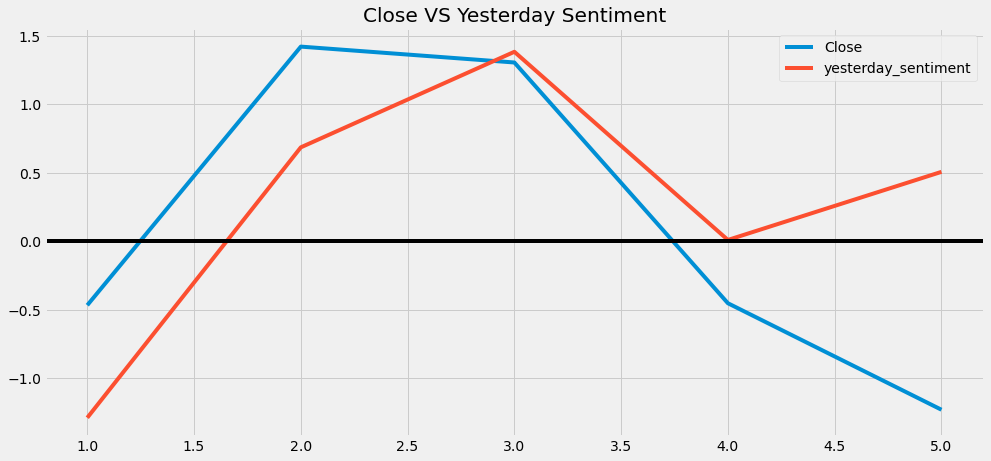

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,7));
plt.plot(df.Close, label='Close')
plt.plot(df.yesterday_sentiment, label='yesterday_sentiment')
plt.axhline(y=0.0, color='black', linestyle='-')
plt.legend()
plt.title('Close VS Yesterday Sentiment')